(10, 10)
[[1.69358763 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         4.37328886 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         3.73268035 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         5.10053492 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         4.40494045 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         8.34652937
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  6.79798531 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         4.438635   0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         4.73681347 0.        ]
 [0.         0.     

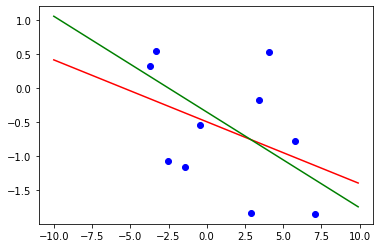

In [20]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import math
# generate "noisy" data
n = 10 # number of points
x = 5*np.random.randn(n)
y = np.random.randn(1)*x + np.random.randn(1) # first-order polynomial
y = y + np.random.randn(n) # add noise
# your least-squares and weighted least-squares code here
X = np.stack( (x, np.ones((len(x)))), axis=1) #turns our x's into a matrix for our matrix multiplication
u = inv(np.transpose(X)@X)@np.transpose(X)@y # Calculates least squares using X transpose * X * X tranpose * yi


#weighted least squared
wlist = []
for i in range(n):
    wchunk = []
    for j in range(n):
        if j==i:
            wchunk.append(1 + np.sqrt( np.square(x[j]) + np.square(y[j])))
        else:
            wchunk.append(0)
    wlist.append(wchunk)

                               
         
    
W = np.array (wlist)
print(W.shape)
print(W)

uw = inv(np.transpose(X)@np.transpose(W)@W@X)@np.transpose(X)@np.transpose(W)@W@y
# plot data and least-squares fit
x0 = np.arange(-10,10,0.1)
y1 = u[0]*x0 + u[1]
y2 = uw[0]*x0 + uw[1]
ax = plt.subplot(1,1,1)
plt.plot(x,y,'bo', label='data') # original data
plt.plot( x0, y1, 'r-', label='LS') # least-squares fit
plt.plot( x0, y2, 'g-', label='WLS' ) # weighted least-squares fitax.legend()plt.show()